<a href="https://colab.research.google.com/github/petebusey/20019-20_Pistons_Salaries_csv/blob/master/Roberts_msds_422_week_6_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd


In [31]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train (1).csv


In [32]:
import io
df= pd.read_csv(io.BytesIO(data_to_load['train.csv']))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [34]:
from google.colab import files
data_to_load = files.upload()

Saving test.csv to test (1).csv


In [35]:
import io
df_2 = pd.read_csv(io.BytesIO(data_to_load['test.csv']))

In [205]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [206]:
# used this to figure it out...  https://medium.com/@simonprdhm/2-ways-to-upload-csv-files-to-google-colab-4d29ffa9db85
# this article also offers another solution
# which is uploading files to google drive and then loading from there

In [207]:
import numpy as np
import pandas as pd
import os
import random
import time
import datetime

import os, numpy as np, pandas, csv, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV as srch
from sklearn.metrics import f1_score as fl
from matplotlib import pyplot as plt

import pickle
import tensorflow as tf
#from os.path import isfile, isdir
% matplotlib inline

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils   

In [208]:
train = df

In [209]:
test = df_2

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [212]:
train.shape


(42000, 785)

In [213]:
test.shape

(28000, 784)

In [214]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
X_train = train.drop(["label"],axis = 1)
Y_train = train["label"]
test=test

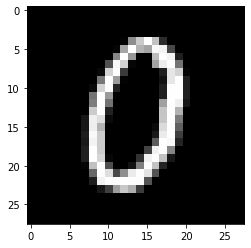

In [216]:
first_image = np.array(train.iloc[5,1:785], dtype='float')
pixels = first_image.reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [217]:
# Inspect class balances for train set, seems relatively balanced
print(train['label'].value_counts(ascending=False))
print('--------------------')
print(train['label'].value_counts(normalize=True))

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
--------------------
1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


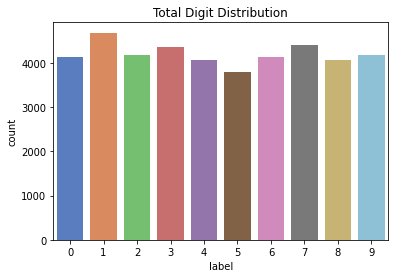

In [218]:
import seaborn as sns

# Plot total distribution of labels in Kaggle train set
mn_plt_total = sns.countplot(train['label'], palette="muted").set_title('Total Digit Distribution')

In [219]:
# normalize the data
 # normalize each value for each pixel for the entire vector for each input
X_train = X_train/255.0
test = test/255.0

In [220]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [221]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [222]:
from sklearn.model_selection import train_test_split
# Set the random seed
random_seed = 123
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

In [223]:

print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (33600, 784)
Y_train shape (33600,)
X_test shape (8400, 784)
Y_test shape (8400,)


In [224]:
from keras.utils.np_utils import to_categorical
#nb_classes = 10 # number of unique digits
#Y_train = to_categorical(Y_train, nb_classes)
#could also write it
#Y_train = np_utils.to_categorical(Y_train, num_classes = 10)

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [225]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

In [226]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [227]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

In [228]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

In [229]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [230]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [231]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [232]:
# Summarize the built model

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_52 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_53 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

In [233]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [234]:
# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit,end=datetime.now(),(model.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 3s 11ms/step - loss: 0.5692 - accuracy: 0.8303
Epoch 2/5
263/263 [==============================] - 3s 12ms/step - loss: 0.1342 - accuracy: 0.9588
Epoch 3/5
263/263 [==============================] - 3s 12ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 4/5
263/263 [==============================] - 3s 12ms/step - loss: 0.0608 - accuracy: 0.9801
Epoch 5/5
263/263 [==============================] - 3s 12ms/step - loss: 0.0457 - accuracy: 0.9857
Total time to fit model: 0:00:15.927568


In [235]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 512 nodes for first two layers, and 10 nodes for third layer, dropout 0.2:', score[1])

263/263 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9761
Test score: 0.08354108780622482
Test accuracy, 512 nodes for first two layers, and 10 nodes for third layer, dropout 0.2: 0.9760714173316956


In [236]:
# The Sequential model is a linear stack of layers and is very common.
#Creating a 2nd model

model_2 = Sequential()

# 1st layer
model_2.add(Dense(20, input_shape=(784,)))
model_2.add(Activation('relu'))

In [237]:
# 2nd hidden layer
model_2.add(Dense(10))
model_2.add(Activation('relu'))

In [238]:
model_2.add(Activation('softmax'))

In [239]:
# Summarize the built model

model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_55 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_56 (Activation)   (None, 10)                0         
_________________________________________________________________
activation_57 (Activation)   (None, 10)                0         
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [240]:
# Let's use the Adam optimizer for learning
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [241]:
# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_2,end=datetime.now(),(model_2.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 2ms/step - loss: 1.4236 - accuracy: 0.5818
Epoch 2/5
263/263 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.8727
Epoch 3/5
263/263 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.9216
Epoch 4/5
263/263 [==============================] - 1s 2ms/step - loss: 0.2453 - accuracy: 0.9295
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 0.2258 - accuracy: 0.9358
Total time to fit model: 0:00:03.548942


In [242]:
score = model_2.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, a layer of 20 nodes in first layer and 10 in second layer::', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9312
Test score: 0.23401477932929993
Test accuracy, a layer of 20 nodes in first layer and 10 in second layer:: 0.9311904907226562


In [243]:
# create 3rd model

# The Sequential model is a linear stack of layers and is very common.

model_3 = Sequential()

# 1st layer
model_3.add(Dense(20, input_shape=(784,)))
model_3.add(Activation('relu'))

# 2nd hidden layer
model_3.add(Dense(20))
model_3.add(Activation('relu'))

# 3rd hidden layer
model_3.add(Dense(20))
model_3.add(Activation('relu'))

# 4th hidden layer
model_3.add(Dense(20))
model_3.add(Activation('relu'))

# 5th hidden layer
model_3.add(Dense(10))
model_3.add(Activation('relu'))

model_3.add(Activation('softmax'))

# Summarize the built model

model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_58 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_59 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_60 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 20)              

In [244]:
# Let's use the Adam optimizer for learning
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [245]:
# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_3,end=datetime.now(),(model_3.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 2ms/step - loss: 1.6126 - accuracy: 0.4177
Epoch 2/5
263/263 [==============================] - 1s 2ms/step - loss: 0.5726 - accuracy: 0.8047
Epoch 3/5
263/263 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.8191
Epoch 4/5
263/263 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.8337
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8427
Total time to fit model: 0:00:03.802445


In [246]:
score = model_3.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 5 layers of 20 nodes per layer::', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8364
Test score: 0.44764038920402527
Test accuracy, 5 layers of 20 nodes per layer:: 0.8364285826683044


In [247]:
# create 4th model

# The Sequential model is a linear stack of layers and is very common.

model_4 = Sequential()

# 1st layer
model_4.add(Dense(10, input_shape=(784,)))
model_4.add(Activation('relu'))

# 2nd hidden layer
model_4.add(Dense(10))
model_4.add(Activation('relu'))

# 3rd hidden layer
model_4.add(Dense(10))
model_4.add(Activation('relu'))

# 4th hidden layer
model_4.add(Dense(10))
model_4.add(Activation('relu'))

# 5th hidden layer
model_4.add(Dense(10))
model_4.add(Activation('relu'))

model_4.add(Activation('softmax'))

# Summarize the built model

model_4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_64 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_65 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_66 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

In [248]:
# Let's use the Adam optimizer for learning
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_4,end=datetime.now(),(model_4.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 3ms/step - loss: 1.9068 - accuracy: 0.3411
Epoch 2/5
263/263 [==============================] - 1s 3ms/step - loss: 0.7905 - accuracy: 0.7549
Epoch 3/5
263/263 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.8767
Epoch 4/5
263/263 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8978
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.9070
Total time to fit model: 0:00:04.010724


In [249]:
score = model_4.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 5 layers of 10 nodes per layer:', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.9096
Test score: 0.32620394229888916
Test accuracy, 5 layers of 10 nodes per layer: 0.9096428751945496


In [250]:
# create 5th model

# The Sequential model is a linear stack of layers and is very common.

model_5 = Sequential()

# 1st layer
model_5.add(Dense(10, input_shape=(784,)))
model_5.add(Activation('relu'))

# 2nd hidden layer
model_5.add(Dense(10))
model_5.add(Activation('relu'))

model_5.add(Activation('softmax'))

# Summarize the built model

model_5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_70 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_71 (Activation)   (None, 10)                0         
_________________________________________________________________
activation_72 (Activation)   (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [251]:
# Let's use the Adam optimizer for learning
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_5,end=datetime.now(),(model_5.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 2ms/step - loss: 1.6384 - accuracy: 0.4697
Epoch 2/5
263/263 [==============================] - 1s 2ms/step - loss: 0.6628 - accuracy: 0.7958
Epoch 3/5
263/263 [==============================] - 1s 2ms/step - loss: 0.5600 - accuracy: 0.8169
Epoch 4/5
263/263 [==============================] - 1s 2ms/step - loss: 0.5158 - accuracy: 0.8265
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 0.4949 - accuracy: 0.8308
Total time to fit model: 0:00:03.457908


In [252]:
score = model_5.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 2 layers of 10 nodes per layer:', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.8230
Test score: 0.5097153186798096
Test accuracy, 2 layers of 10 nodes per layer: 0.8229761719703674


In [253]:
# create 6th model

# The Sequential model is a linear stack of layers and is very common.

model_6 = Sequential()

# 1st layer
model_6.add(Dense(10, input_shape=(784,)))
model_6.add(Activation('relu'))

# 2nd hidden layer
model_6.add(Dense(10))
model_6.add(Activation('relu'))

# 3rd hidden layer
model_6.add(Dense(10))
model_6.add(Activation('relu'))

# 4th hidden layer
model_6.add(Dense(10))
model_6.add(Activation('relu'))

# 5th hidden layer
model_6.add(Dense(10))
model_6.add(Activation('relu'))

model_6.add(Activation('softmax'))

# Summarize the built model

model_6.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_73 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_74 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_75 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)              

In [254]:
# Let's use the Adam optimizer for learning
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_6,end=datetime.now(),(model_6.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 2ms/step - loss: 1.9535 - accuracy: 0.2877
Epoch 2/5
263/263 [==============================] - 1s 3ms/step - loss: 0.8596 - accuracy: 0.7374
Epoch 3/5
263/263 [==============================] - 1s 2ms/step - loss: 0.6111 - accuracy: 0.8049
Epoch 4/5
263/263 [==============================] - 1s 3ms/step - loss: 0.5376 - accuracy: 0.8241
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 0.3192 - accuracy: 0.9117
Total time to fit model: 0:00:03.994502


In [255]:
score = model_6.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 5 layers of 10 nodes per layer:', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.9108
Test score: 0.31940126419067383
Test accuracy, 5 layers of 10 nodes per layer: 0.9108333587646484


In [256]:
# create 7th model

# The Sequential model is a linear stack of layers and is very common.

model_7 = Sequential()

# 1st layer
model_7.add(Dense(20, input_shape=(784,)))
model_5.add(Activation('relu'))

# 2nd hidden layer
model_7.add(Dense(10))
model_7.add(Activation('relu'))

model_7.add(Activation('softmax'))

# Summarize the built model

model_7.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_80 (Activation)   (None, 10)                0         
_________________________________________________________________
activation_81 (Activation)   (None, 10)                0         
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [257]:
# Let's use the Adam optimizer for learning
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_7,end=datetime.now(),(model_7.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 2ms/step - loss: 1.1969 - accuracy: 0.6314
Epoch 2/5
263/263 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.9029
Epoch 3/5
263/263 [==============================] - 1s 2ms/step - loss: 0.3007 - accuracy: 0.9135
Epoch 4/5
263/263 [==============================] - 1s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9236
Total time to fit model: 0:00:03.869488


In [258]:
score = model_7.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 1 layers 20 nodes and 1 layer of 10 nodes:', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9186
Test score: 0.28679731488227844
Test accuracy, 1 layers 20 nodes and 1 layer of 10 nodes: 0.918571412563324


In [259]:
# create 8th model

# The Sequential model is a linear stack of layers and is very common.

model_8 = Sequential()

# 1st layer
model_8.add(Dense(512, input_shape=(784,)))
model_8.add(Activation('relu'))

# 2nd hidden layer
model_8.add(Dense(512))
model_8.add(Activation('relu'))

# 3rd hidden layer
model_8.add(Dense(512))
model_8.add(Activation('relu'))

# 4th hidden layer
model_8.add(Dense(512))
model_8.add(Activation('relu'))

# 5th hidden layer
model_8.add(Dense(10))
model_8.add(Activation('relu'))

model_8.add(Activation('softmax'))

# Summarize the built model

model_8.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_82 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_83 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_84 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 512)             

In [260]:
# Let's use the Adam optimizer for learning
model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_8,end=datetime.now(),(model_8.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 5s 18ms/step - loss: 1.4587 - accuracy: 0.5115
Epoch 2/5
263/263 [==============================] - 5s 18ms/step - loss: 1.2127 - accuracy: 0.5878
Epoch 3/5
263/263 [==============================] - 5s 18ms/step - loss: 1.1750 - accuracy: 0.5993
Epoch 4/5
263/263 [==============================] - 5s 18ms/step - loss: 1.1677 - accuracy: 0.6016
Epoch 5/5
263/263 [==============================] - 5s 18ms/step - loss: 1.1580 - accuracy: 0.6017
Total time to fit model: 0:00:24.341067


In [261]:
score = model_8.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 4 layers of 512 nodes and 1 layer of 10 nodes:', score[1])

263/263 [==============================] - 1s 3ms/step - loss: 1.2081 - accuracy: 0.5874
Test score: 1.2080984115600586
Test accuracy, 4 layers of 512 nodes and 1 layer of 10 nodes: 0.5873809456825256


In [262]:
# create 9th model

# The Sequential model is a linear stack of layers and is very common.

model_9 = Sequential()

# 1st layer
model_9.add(Dense(512, input_shape=(784,)))
model_9.add(Activation('relu'))
model_9.add(Dropout(0.2))

# 2nd hidden layer
model_9.add(Dense(512))
model_9.add(Activation('relu'))
model_9.add(Dropout(0.2))

# 3rd hidden layer
model_9.add(Dense(512))
model_9.add(Activation('relu'))
model_9.add(Dropout(0.2))

# 4th hidden layer
model_9.add(Dense(512))
model_9.add(Activation('relu'))
model_9.add(Dropout(0.2))

# 5th hidden layer
model_9.add(Dense(10))
model_9.add(Activation('relu'))

model_9.add(Activation('softmax'))

# Summarize the built model

model_9.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_88 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_89 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)             

In [263]:
# Let's use the Adam optimizer for learning
model_9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_9,end=datetime.now(),(model_9.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 6s 22ms/step - loss: 0.8699 - accuracy: 0.7449
Epoch 2/5
263/263 [==============================] - 6s 22ms/step - loss: 0.1512 - accuracy: 0.9554
Epoch 3/5
263/263 [==============================] - 6s 22ms/step - loss: 0.1079 - accuracy: 0.9668
Epoch 4/5
263/263 [==============================] - 6s 22ms/step - loss: 0.0837 - accuracy: 0.9750
Epoch 5/5
263/263 [==============================] - 6s 22ms/step - loss: 0.0646 - accuracy: 0.9790
Total time to fit model: 0:00:29.498578


In [264]:
score = model_9.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 4 layers of 512 nodes and 1 layer of 10 nodes, with dropout of 0.2:', score[1])

263/263 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9746
Test score: 0.08922681957483292
Test accuracy, 4 layers of 512 nodes and 1 layer of 10 nodes, with dropout of 0.2: 0.9746428728103638


In [265]:
# create 10th model

# The Sequential model is a linear stack of layers and is very common.

model_10 = Sequential()

# 1st layer
model_10.add(Dense(20, input_shape=(784,)))
model_10.add(Activation('relu'))
model_10.add(Dropout(0.2))

# 2nd hidden layer
model_10.add(Dense(20))
model_10.add(Activation('relu'))
model_10.add(Dropout(0.2))

# 3rd hidden layer
model_10.add(Dense(10))
model_10.add(Activation('relu'))

model_10.add(Activation('softmax'))

# Summarize the built model

model_10.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_94 (Activation)   (None, 20)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_95 (Activation)   (None, 20)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)              

In [266]:
# Let's use the Adam optimizer for learning
model_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train,
 #         batch_size=128, epochs=5,
 #         verbose=1)

start,myfit_10,end=datetime.now(),(model_10.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)),datetime.now()
print("Total time to fit model:" , end-start)

Epoch 1/5
263/263 [==============================] - 1s 3ms/step - loss: 1.6329 - accuracy: 0.4233
Epoch 2/5
263/263 [==============================] - 1s 3ms/step - loss: 0.7403 - accuracy: 0.7621
Epoch 3/5
263/263 [==============================] - 1s 3ms/step - loss: 0.5806 - accuracy: 0.8159
Epoch 4/5
263/263 [==============================] - 1s 3ms/step - loss: 0.5226 - accuracy: 0.8404
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 0.4784 - accuracy: 0.8554
Total time to fit model: 0:00:04.030203


In [267]:
score = model_10.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy, 2 layers of 20 nodes and 1 layer of 10 nodes, with dropout of 0.2:', score[1])

263/263 [==============================] - 0s 1ms/step - loss: 0.2700 - accuracy: 0.9213
Test score: 0.27003175020217896
Test accuracy, 2 layers of 20 nodes and 1 layer of 10 nodes, with dropout of 0.2: 0.9213095307350159


In [268]:
# predict results
model_results = model.predict(test)
# select the index with the maximum probability
model_results = np.argmax(model_results,axis = 1)
model_results = pd.Series(model_results,name="Label")

In [269]:
model_results.shape

(28000,)

In [270]:
model_results.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64

In [271]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('model_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 1 ')

Final predictions for model 1 


In [272]:
#submission = submission.drop(submission.columns[[0]], axis=1)
#submission.columns = ['ImageID', 'Label']
#submission = submission[['ImageID', 'Label']]

In [273]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"model_mnist_predictions7.csv', index=False)

Mounted at /drive


In [274]:
# predict results
model_2_results = model_2.predict(test)
# select the index with the maximum probability
model_2_results = np.argmax(model_2_results,axis = 1)
model_2_results = pd.Series(model_2_results,name="Label")

In [275]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_2_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_2_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 2 ')

Final predictions for model 2 


In [276]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_2_mnist_predictions.csv', index=False)

Mounted at /drive


In [277]:
# predict results
model_3_results = model_3.predict(test)
# select the index with the maximum probability
model_3_results = np.argmax(model_3_results,axis = 1)
model_3_results = pd.Series(model_3_results,name="Label")

In [278]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_3_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_3_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 3 ')

Final predictions for model 3 


In [279]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_3_mnist_predictions.csv', index=False)

Mounted at /drive


In [280]:
# predict results
model_4_results = model_4.predict(test)
# select the index with the maximum probability
model_4_results = np.argmax(model_4_results,axis = 1)
model_4_results = pd.Series(model_4_results,name="Label")

In [281]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_4_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_4_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 4 ')

Final predictions for model 4 


In [282]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_4_mnist_predictions.csv', index=False)

Mounted at /drive


In [283]:
# predict results
model_5_results = model_5.predict(test)
# select the index with the maximum probability
model_5_results = np.argmax(model_5_results,axis = 1)
model_5_results = pd.Series(model_5_results,name="Label")

In [284]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_5_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_5_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 5 ')

Final predictions for model 5 


In [285]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_5_mnist_predictions.csv', index=False)

Mounted at /drive


In [286]:
# predict results
model_6_results = model_6.predict(test)
# select the index with the maximum probability
model_6_results = np.argmax(model_6_results,axis = 1)
model_6_results = pd.Series(model_6_results,name="Label")

In [287]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_6_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_6_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 6 ')

Final predictions for model 6 


In [288]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_6_mnist_predictions.csv', index=False)

Mounted at /drive


In [289]:
# predict results
model_7_results = model_7.predict(test)
# select the index with the maximum probability
model_7_results = np.argmax(model_7_results,axis = 1)
model_7_results = pd.Series(model_7_results,name="Label")

In [290]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_7_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_7_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 7 ')

Final predictions for model 7 


In [291]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_7_mnist_predictions.csv', index=False)

Mounted at /drive


In [292]:
# predict results
model_8_results = model_8.predict(test)
# select the index with the maximum probability
model_8_results = np.argmax(model_8_results,axis = 1)
model_8_results = pd.Series(model_8_results,name="Label")

In [293]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_8_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_8_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 8 ')

Final predictions for model 8 


In [294]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_8_mnist_predictions.csv', index=False)

Mounted at /drive


In [295]:
# predict results
model_9_results = model_9.predict(test)
# select the index with the maximum probability
model_9_results = np.argmax(model_9_results,axis = 1)
model_9_results = pd.Series(model_9_results,name="Label")

In [296]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_9_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_9_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 9 ')

Final predictions for model 9 


In [297]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_9_mnist_predictions.csv', index=False)

Mounted at /drive


In [298]:
# predict results
model_10_results = model_10.predict(test)
# select the index with the maximum probability
model_10_results = np.argmax(model_10_results,axis = 1)
model_10_results = pd.Series(model_10_results,name="Label")

In [299]:
# # Create Dataframe
# data = final_predictions
df_1 = pd.DataFrame(model_10_results)
df_1['ImageID'] = df_1.index + 1
df_1.columns = ['Label', 'ImageID']
submission = df_1[['ImageID', 'Label']]

# # Output to csv
submission.to_csv('Roberts_NNmodel_10_mnist_predictions.csv',header=True, index=False)
print('Final predictions for model 10 ')

Final predictions for model 10 


In [300]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

submission.to_csv('/drive/My Drive/MSDS 422/"Roberts_NNmodel_10_mnist_predictions.csv', index=False)

Mounted at /drive
